In [8]:
from matplotlib import pyplot as plt
from numba import njit,prange
import numpy as np
from math import sqrt

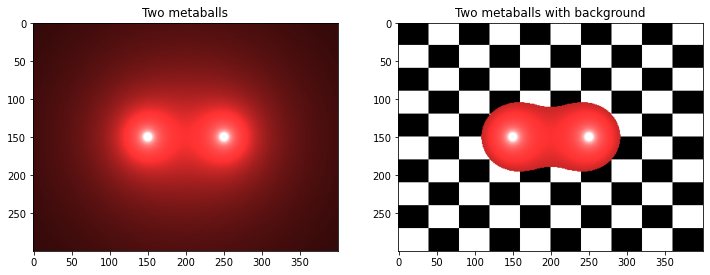

In [40]:
WIDTH,HEIGHT=400,300
#number of metaballs
Nballs=2
balls=np.zeros((Nballs,6),dtype='float64')
#components of a metaball: x,y,radius, color
balls[0]=[150,150,25,255,50,50]
balls[1]=[250,150,25,255,50,50]
#image to show the metaballs
image=np.zeros((HEIGHT,WIDTH,3),dtype='int64')

@njit
def update_image(image,width,height,balls):
    image.fill(0)
    for x in prange(width):
        for y in prange(height):
            for i in prange(balls.shape[0]):
                b=balls[i]
                #could use other distance functions
                dist=(b[0]-x)**2+(b[1]-y)**2
                dist=sqrt(dist); brightness=b[2]/(.0001+dist)
                image[y,x]+=(brightness*b[3:6]).astype(np.int64)
@njit
# to have a background image 
def background(image,width,height,threshold):
    for x in range(width):
        for y in range(height):
            if image[y,x].max()<threshold:
                image[y,x]=255*int((int(10*x/width)\
                            +int(10*y/height))%2)

update_image(image,WIDTH,HEIGHT,balls)
image=np.minimum(image,255)
plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(image)
plt.title('Two metaballs')
background(image,WIDTH,HEIGHT,200)
plt.subplot(122);plt.imshow(image)
plt.title('Two metaballs with background')
plt.show()